In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf

In [2]:
datasets = ["BAC"]


for dataset in datasets:
    Ticker = yf.Ticker(dataset)
    data = Ticker.history(start="2023-05-15", end="2023-07-15")
    filename = f"{dataset}_data.csv"
    data.to_csv(filename)
    print(f"Download data for {dataset} and saved as {filename}")

Download data for BAC and saved as BAC_data.csv


In [13]:
Ticker = 'BAC'
start_date = '2023-05-15'
end_date = '2023-08-20'
data = yf.download(Ticker, start=start_date, end=end_date)

[*********************100%%**********************]  1 of 1 completed


In [14]:
data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-05-15,27.100000,27.820000,27.030001,27.650000,27.431108,38722800
2023-05-16,27.780001,27.900000,27.330000,27.360001,27.143404,33347500
2023-05-17,27.740000,28.670000,27.730000,28.570000,28.343824,61750400
2023-05-18,28.440001,28.500000,28.000000,28.469999,28.244616,51146100
2023-05-19,28.459999,28.670000,28.030001,28.110001,27.887468,49984200
...,...,...,...,...,...,...
2023-08-14,31.049999,31.110001,30.750000,30.930000,30.930000,32563700
2023-08-15,30.500000,30.549999,29.840000,29.940001,29.940001,43406100
2023-08-16,29.750000,29.840000,29.209999,29.290001,29.290001,47220400


# Import Data

In [15]:
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-05-15,27.100000,27.82,27.030001,27.650000,27.431108,38722800
2023-05-16,27.780001,27.90,27.330000,27.360001,27.143404,33347500
2023-05-17,27.740000,28.67,27.730000,28.570000,28.343824,61750400
2023-05-18,28.440001,28.50,28.000000,28.469999,28.244616,51146100
2023-05-19,28.459999,28.67,28.030001,28.110001,27.887468,49984200


In [16]:
data.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-08-14,31.049999,31.110001,30.750000,30.930000,30.930000,32563700
2023-08-15,30.500000,30.549999,29.840000,29.940001,29.940001,43406100
2023-08-16,29.750000,29.840000,29.209999,29.290001,29.290001,47220400
2023-08-17,29.440001,29.540001,29.110001,29.280001,29.280001,37202200
2023-08-18,29.040001,29.350000,28.980000,29.110001,29.110001,31418000


In [25]:
data.corr()

,Open,High,Low,Close,Adj Close,Volume,Daily_Return
Open,1.000000,0.983807,0.987950,0.967584,0.967768,-0.123067,-0.110853
High,0.983807,1.000000,0.992174,0.990648,0.990098,-0.068085,0.042900
Low,0.987950,0.992174,1.000000,0.987863,0.988103,-0.137946,0.008048
Close,0.967584,0.990648,0.987863,1.000000,0.998684,-0.075317,0.113620
Adj Close,0.967768,0.990098,0.988103,0.998684,1.000000,-0.079978,0.110952
Volume,-0.123067,-0.068085,-0.137946,-0.075317,-0.079978,1.000000,0.350160
Daily_Return,-0.110853,0.042900,0.008048,0.113620,0.110952,0.350160,1.000000


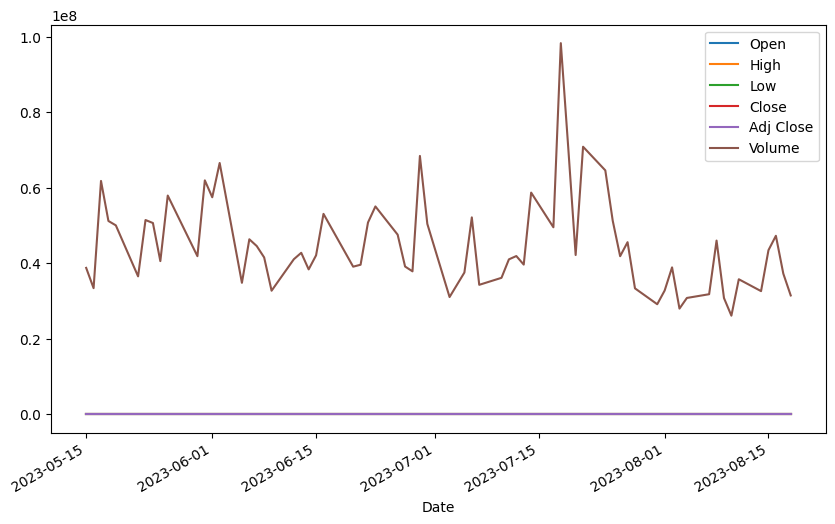

In [17]:
data.plot(figsize=(10, 6));

# Calculate Returns

In [18]:
data['Daily_Return'] = data['Close'].pct_change()

# Calculate Risk Metrics

In [19]:
std_dev = np.std(data['Daily_Return'])
var_95 = np.percentile(data['Daily_Return'], 5)

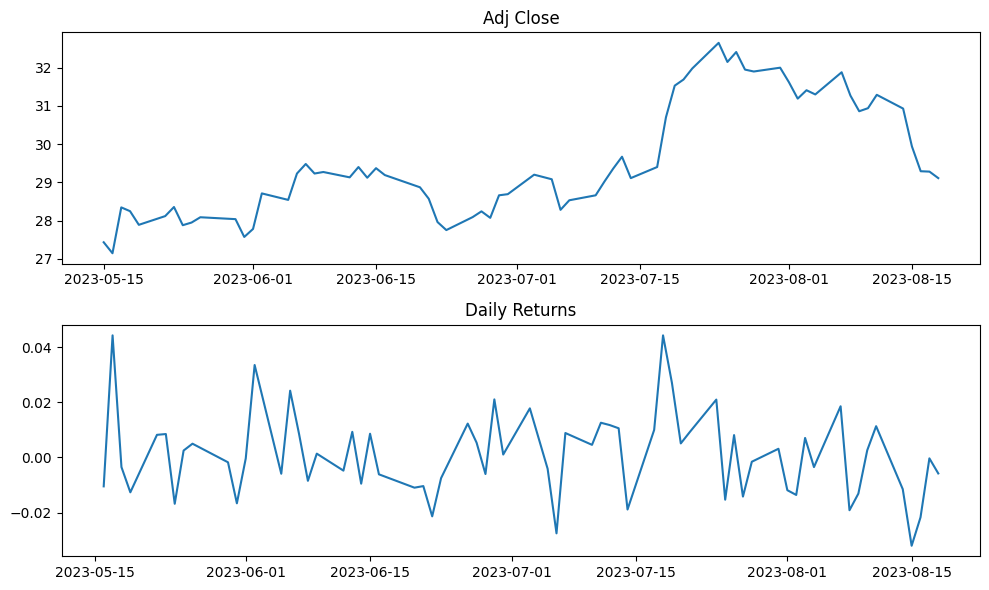

In [24]:
plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 2)
plt.plot(data['Daily_Return'])
plt.title('Daily Returns')

plt.subplot(2, 1, 1)
plt.plot(data['Adj Close'])
plt.title('Adj Close')

plt.tight_layout()
plt.show()

## Monte Carlo Simulation

In [29]:
num_simulations = 1000
num_days = 252

In [26]:
mean_return = np.mean(data['Daily_Return'])
std_dev_return = np.std(data['Daily_Return'])

In [31]:
daily_return = np.random.normal(mean_return, std_dev_return, (num_days, num_simulations))

In [32]:
cumulative_returns = np.cumprod(1 + daily_return, axis=0)

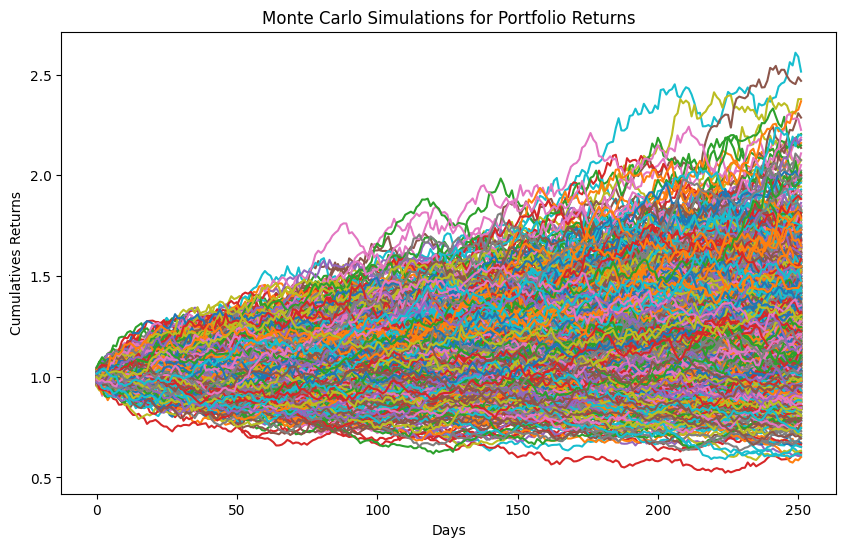

In [33]:
plt.figure(figsize=(10, 6))
plt.plot(cumulative_returns)
plt.title('Monte Carlo Simulations for Portfolio Returns')
plt.xlabel('Days')
plt.ylabel('Cumulatives Returns')
plt.show()
